#MNIST - Conclusão dos Estudos

In [1]:
import warnings; warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import requests
import joblib

from keras.datasets import mnist
from tensorflow import keras
from io import BytesIO


## Carregar um dígito do Dataset original

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5  
X_train = X_train.reshape(60000, 784)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#indice = 1980 #4
#indice = 666 #7
#indice = 1234 #8
#indice = 100 #6
indice = 1983 #3

digitoDataset = X_test[indice]
print("Distribuição dos pixels originalmente: " + str(digitoDataset.shape))

digitoDataset = digitoDataset.reshape(28,28)
print("Distribuição dos pixels redistribuído para 28X28: " + str(digitoDataset.shape))

print("No dataset, representa o numero: %d" % y_test[indice])

plt.figure(figsize=(0.28, 0.28))
plt.imshow(digitoDataset, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.subplot()    
plt.tight_layout()
plt.savefig("digito_gerado.png", dpi=100)
plt.show()

digito = digitoDataset.reshape(1,784)

Distribuição dos pixels originalmente: (28, 28)
Distribuição dos pixels redistribuído para 28X28: (28, 28)
No dataset, representa o numero: 3


## Carregar o gerador e criar um novo dígito

In [5]:
z_dim = 100

g = keras.models.load_model('/content/gerador.h5')
g.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 784)               803600    
                                                                 
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
_________________________________________________________________


In [6]:
def gerar_digito(n_ex=10, dim=(1, 10), figsize=(2, 2)):
    noise = np.random.normal(0, 1, size=(n_ex, z_dim))
    generated_images = g.predict(noise)
    generated_images = generated_images.reshape(28, 28)
    
    plt.figure(figsize=figsize)
    plt.imshow(generated_images, interpolation='nearest', cmap=matplotlib.cm.binary)
    plt.axis('off')
    plt.subplot()    
    plt.tight_layout()
    plt.savefig("digito_gerado.png")

    plt.show()  

1/1 [==============================] - 0s 43ms/step


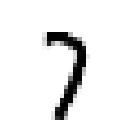

In [20]:
gerar_digito(n_ex=1)

## Transformar a imagem em um array de pixels

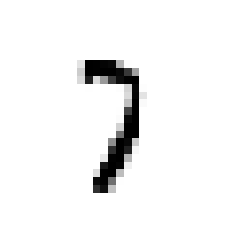

In [21]:
image_list = '/content/digito_gerado.png'
array_list = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(image_list, color_mode='grayscale', target_size=(28,28))).reshape(1,784).astype(np.int32)

plt.imshow(array_list.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

## Carregar os modelos treinados

In [13]:
mLink = 'https://github.com/diegonogare/MachineLearning/blob/main/modelo_dt_mnist.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
modelo_dt = joblib.load(mfile)

mLink = 'https://github.com/diegonogare/MachineLearning/blob/main/modelo_knn_mnist.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
modelo_knn = joblib.load(mfile)

mLink = 'https://github.com/diegonogare/MachineLearning/blob/main/modelo_mlp_mnist.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
modelo_mlp = joblib.load(mfile)

## Predizer qual é o digito gerado

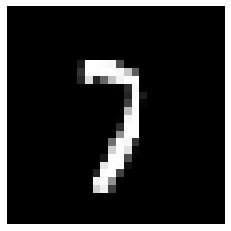

Com Decisin Tree o modelo identificou:  [7]
Com KNN o modelo identificou:  [7]
Com MultiLayer Perceptron o modelo identificou:  [7]


In [22]:
imprimir_digito = abs(255-array_list) #Numero gerado

plt.imshow(imprimir_digito.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

predicao_dt = modelo_dt.predict(imprimir_digito)
predicao_dt = predicao_dt.astype(np.int64)

predicao_knn = modelo_knn.predict(imprimir_digito)
predicao_knn = predicao_knn.astype(np.int64)

predicao_mlp = modelo_mlp.predict(imprimir_digito)
predicao_mlp = predicao_mlp.astype(np.int64)

print("Com Decisin Tree o modelo identificou: ", predicao_dt);
print("Com KNN o modelo identificou: ", predicao_knn);
print("Com MultiLayer Perceptron o modelo identificou: ", predicao_mlp);